**INTRODUCTION**

In this notebook I predict different arrhythmia on the ECG. An Electro Cardio Gram (ECG) is a simple test that can can be used to check your heart rhythm and electrical activity.
The dataset is composed of the heartbeat signals deerived from the MIT-BIH Arrhythmia Dataset which contains 48 half-hour excerpts of two-channel ECG ambulatory recordings.Out of which 23 were randomnly selected from the patients and remaining 25 were chosen to include  less common but clinically significant arrhythmias that would not be well-represented in a small random sample.



In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense # for fully connected layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

# avoid overfitting by normalizing the samples
from tensorflow.keras.layers import BatchNormalization

### Arrhythmia Dataset



**Number of Samples: 109446**

**Number of Categories: 5**

**Sampling Frequency: 125Hz**

**Data Source: MIT-BIH Arrhythmia Dataset**

**Classes: ['N' : 0, 'S' : 1, 'V' : 2, 'F' : 3, 'Q' : 4]**

ECG are classified into these classes as labeled : 
*   N : Non-ecotic beats (normal beat) 
*   S : Supraventricular ectopic beats
*   V : Ventricular ectopic beats
*   F : Fusion Beats
*   Q : Unknown Beats



 

**Loading Data**

In [2]:
# importing dataset from drive

train_data = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
test_data = pd.read_csv("../input/heartbeat/mitbih_test.csv", header=None)

In [3]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**Exploratory Data Analysis**

In [4]:
# checking null values
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

Since data doesn't contain any null values, we can move further

In [5]:
train_data.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

In [6]:
# casting into int
train_data[187] = train_data[187].astype('int')
test_data[187] = test_data[187].astype('int') 

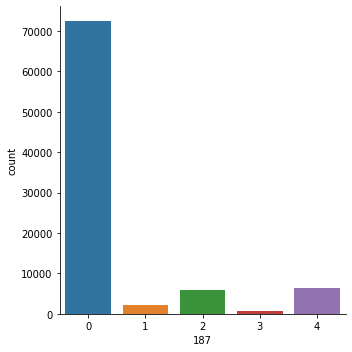

In [7]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_data)

In [8]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


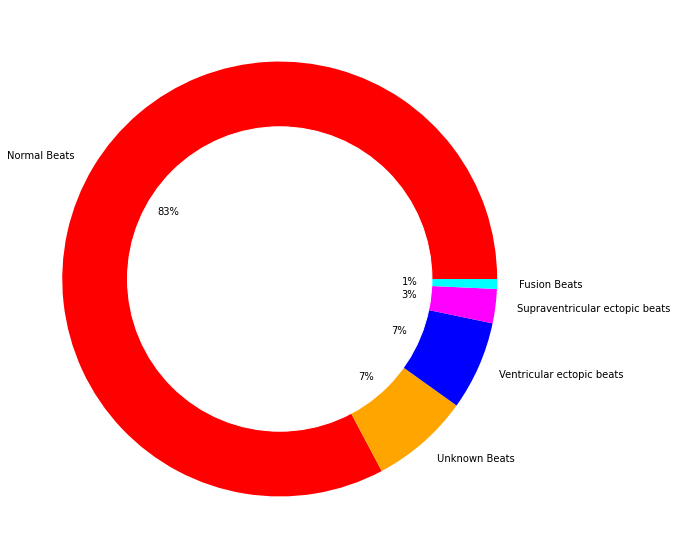

In [9]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

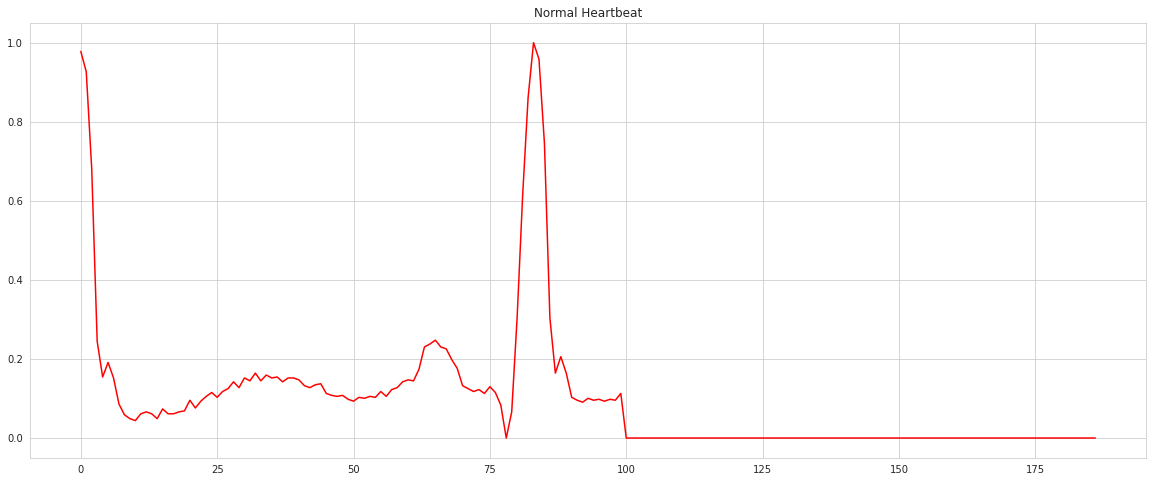

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.title("Normal Heartbeat")
plt.show()

In [11]:
# Splitting data into Each Classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

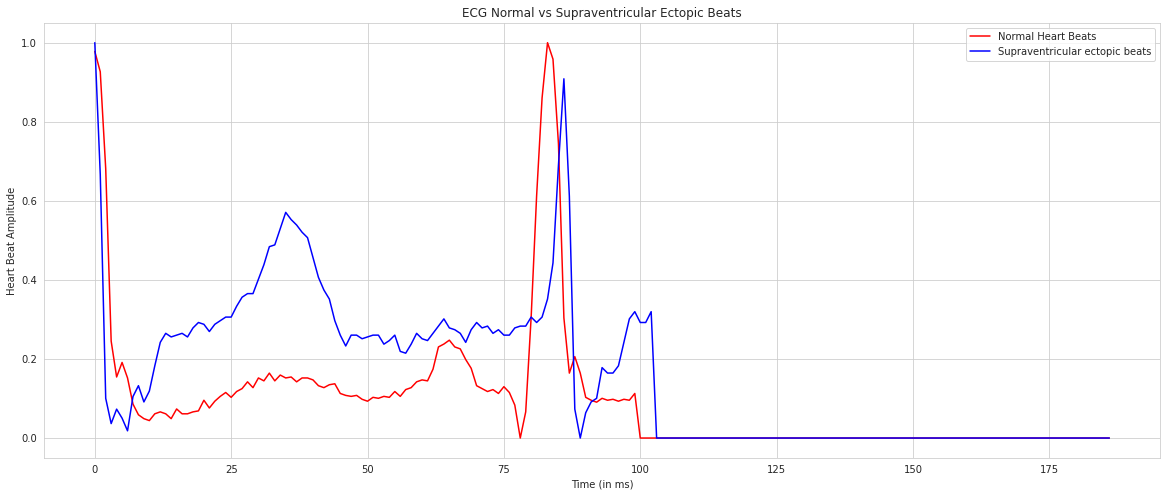

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

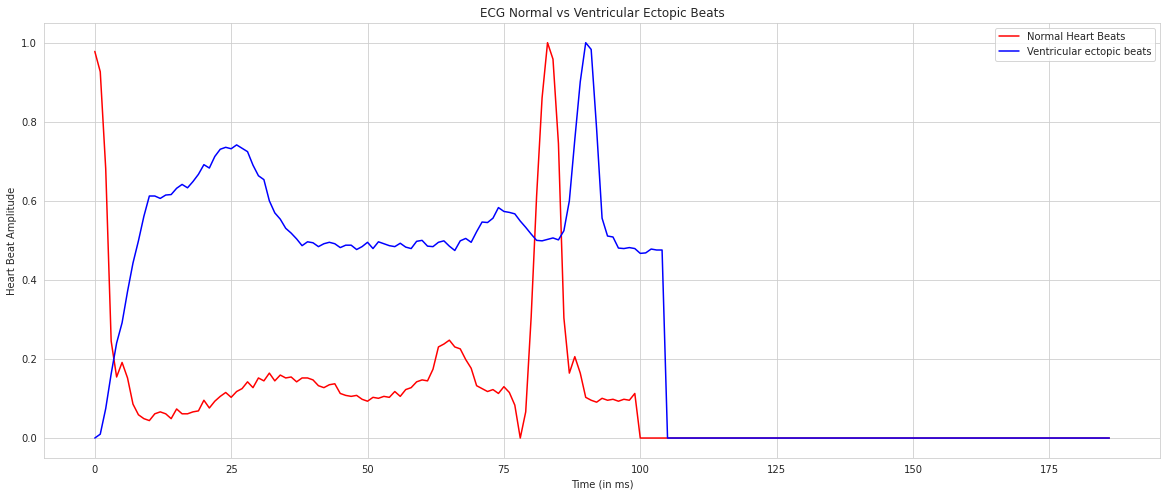

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

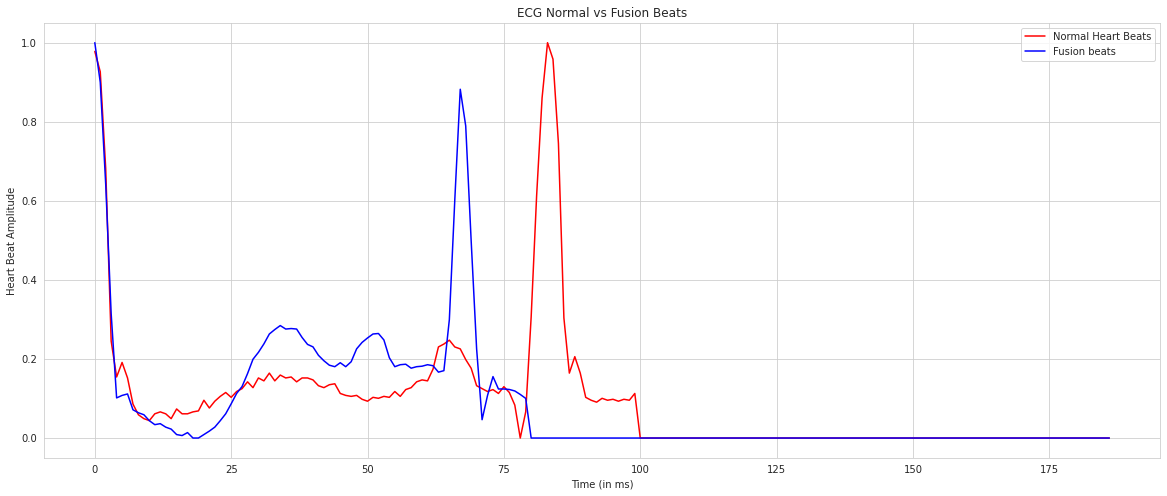

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_3.iloc[0, 0:187], color = 'blue', label = 'Fusion beats')
plt.title("ECG Normal vs Fusion Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

**Data Augmentation**

*   Since data is biased we will upsample it




In [15]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [16]:
# downsample the high number of counts in one class, select random samples 2000 samples from class 0 samples
df_0 = train_data[train_data[187]==0].sample(n =20000, random_state=123)

In [17]:
# merge and all dataframes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

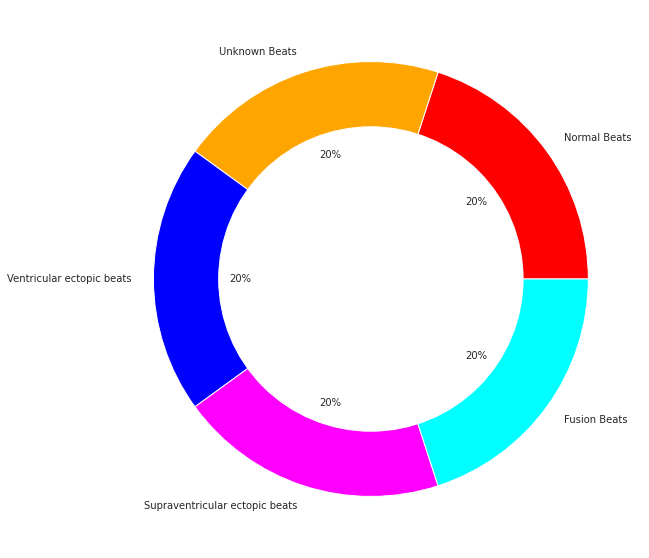

In [18]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats', 'Fusion Beats'], 
        autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

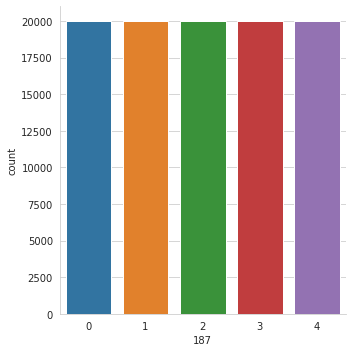

In [19]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_df)

In [20]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14967,1.000000,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
71482,1.000000,0.946619,0.651246,0.330961,0.000000,0.067616,0.092527,0.163701,0.192171,0.177936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23543,1.000000,0.855967,0.302469,0.041152,0.185185,0.160494,0.098765,0.092593,0.109053,0.088477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9174,1.000000,0.838806,0.738806,0.641791,0.604478,0.583582,0.580597,0.580597,0.591045,0.577612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42319,1.000000,0.720257,0.019293,0.106109,0.073955,0.086817,0.070740,0.077170,0.070740,0.083601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86326,0.979769,0.765896,0.820809,0.274566,0.170520,0.150289,0.150289,0.147399,0.135838,0.130058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87200,0.701493,0.611940,0.510448,0.400000,0.282090,0.167164,0.092537,0.046269,0.050746,0.071642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
83385,0.984660,0.934803,0.875360,0.802493,0.705657,0.593480,0.468840,0.371045,0.291467,0.220518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
87507,0.925434,0.875383,0.812053,0.749745,0.660878,0.577120,0.451481,0.347293,0.241062,0.199183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [21]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


Now since the data is balanced we can move further.

In [22]:
# target Y
target_train = train_df[187]
target_test = test_data[187]

In [23]:
target_test

0        0
1        0
2        0
3        0
4        0
        ..
21887    4
21888    4
21889    4
21890    4
21891    4
Name: 187, Length: 21892, dtype: int64

In [24]:
target_train.unique()

array([0, 1, 2, 3, 4])

This is not good for classification, hence we convert them into categorical one hot encoding.

In [25]:
# convert integer values into categorical one hot encoding
# Class 0 - [1,0,0,0,0]
# Class 1 - [0,1,0,0,0]
# Class 2 - [0,0,1,0,0]
# Class 3 - [0,0,0,1,0]
# Class 4 - [0,0,0,0,1]

A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

to_categorical() - Returns a binary matrix representation of the input. The classes axis is placed last.

In [26]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [27]:
y_test = to_categorical(target_test)

In [28]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

iloc[ : ,   : -1] : Selects all rows and all columns without last.

Hence, 100000 rows and 187 columns in the X_train is observed.

In [29]:
# this data is in single dimension, 1D (no of samples, features)
X_train.shape

(100000, 187)

In [30]:
# For conv1D dimensionality should be 187X1 where 187 is number of features and 1 = 1D Dimensionality of data.
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

In [31]:
X_train.shape

(100000, 187, 1)

**CNN - Conv1D**

In [32]:
def build_model():
  model = Sequential()
  
  # Filters = Units in Dense Total number of Neurons
  # Padding = 'same' , zero-padding, Add zero pixels all around input data
  model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (187, 1))) #we pass individual values hence not 100000,187,1
  
  # Normalization to avoid overfitting
  model.add(BatchNormalization())
  
  # Pooling =  Downsamples the input representation by taking the maximum value over a spatial window of size pool_size.
  # The window is shifted by strides.
  # The resulting output shape when using the "same" padding option is: output_shape = input_shape / strides
  model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

  model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

  model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

  # Flatten 
  model.add(Flatten())

  # Fully connected layer
  # input layer
  model.add(Dense(units = 64, activation='relu'))
    
  # Hidden Layer
  model.add(Dense(units = 64, activation='relu'))
  
  # Output Layer
  model.add(Dense(units = 5, activation='softmax'))

  # loss = 'categorical_crossentropy'
  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

relu = Applies the rectified linear unit activation function,i.e returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

softmax = Converts a vector of values to a probability distribution.
The elements of the output vector are in range (0, 1) and sum to 1.

Adam = Optimizer that implements the Adam algorithm.
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

Loss = The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

categorical_crossentropy = Computes the crossentropy loss between the labels and predictions.

metrics = A function that is used to judge the performance of your model

['accuracy'] = Calculates how often predictions equal labels.

In [33]:
model = build_model()

2022-01-20 05:06:44.665510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 05:06:44.770970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 05:06:44.771655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 05:06:44.772817: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [34]:
# This is for one sample, i.e. one row
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 64)           448       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 94, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 94, 64)            24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 47, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 47, 64)            2

In [35]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(X_test, y_test))

2022-01-20 05:06:47.550583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-01-20 05:06:49.448115: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3125/3125 [==============================] - 24s 5ms/step - loss: 0.1870 - accuracy: 0.9332 - val_loss: 0.1652 - val_accuracy: 0.9429
Epoch 2/15
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0737 - accuracy: 0.9745 - val_loss: 0.1423 - val_accuracy: 0.9564
Epoch 3/15
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0495 - accuracy: 0.9835 - val_loss: 0.1486 - val_accuracy: 0.9568
Epoch 4/15
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.1476 - val_accuracy: 0.9542
Epoch 5/15
3125/3125 [==============================] - 15s 5ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.1507 - val_accuracy: 0.9672
Epoch 6/15
3125/3125 [==============================] - 17s 5ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.1482 - val_accuracy: 0.9624
Epoch 7/15
3125/3125 [==============================] - 16s 5ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.1090 - val_accuracy: 0.9

In [36]:
# evaluate ECG Test Data
model.evaluate(X_test, y_test)

685/685 [==============================] - 2s 3ms/step - loss: 0.1406 - accuracy: 0.9733


[0.1405709832906723, 0.9733235836029053]

**Accuracy of the model : 0.9795**

<AxesSubplot:>

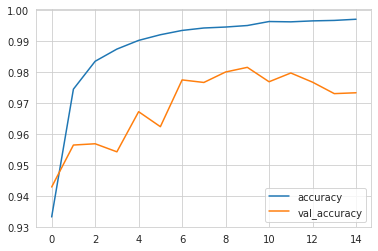

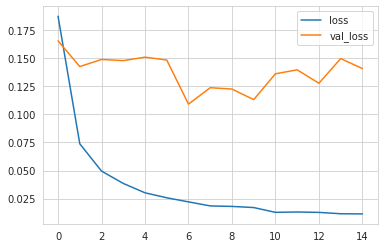

In [37]:
# converting hsitory to dataframe
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

The test (or testing) accuracy often refers to the validation accuracy, that is, the accuracy you calculate on the data set you do not use for training, but you use (during the training process) for validating (or "testing") the generalisation ability of your model .

Loss can be seen as a distance between the true values of the problem and the values predicted by the model. Accuracy can be seen as the number of error you made on the data.

In [38]:
# Make Prediction
predict = model.predict(X_test)

In [39]:
# Predicted o/p will be in probability distribution 
predict

array([[9.9999952e-01, 5.0486523e-07, 2.9620590e-13, 5.7396157e-11,
        2.6883790e-12],
       [9.9999940e-01, 1.8073812e-10, 5.9990140e-07, 2.4446146e-12,
        2.1169416e-08],
       [9.9992645e-01, 7.3140342e-05, 4.1789357e-11, 1.1142086e-10,
        3.2630246e-07],
       ...,
       [2.3179595e-14, 1.3789500e-17, 4.4830852e-14, 2.5148309e-25,
        1.0000000e+00],
       [4.5994356e-35, 0.0000000e+00, 7.9989040e-36, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [40]:
# distributional probability to integers
yhat = np.argmax(predict, axis = 1)

**Single Class Prediction**

In [41]:
# example of making a single class prediction
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=1, random_state=1)
# fit final model
model = Sequential()
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X, y)
# define one new instance
X_new = [[-0.79415228, 2.10495117]]
# X_new = X_new.reshape(len(X_new),X_new[1],1)
# make a prediction
ynew = model.predict(X_new)
print("X=%s, Predicted=%s" % (X_new[:], ynew[:]))
ynew

4/4 [==============================] - 0s 2ms/step - loss: 5.9605e-08 - accuracy: 1.0000
X=[[-0.79415228, 2.10495117]], Predicted=[[-0.79415226  2.1049511 ]]


array([[-0.79415226,  2.1049511 ]], dtype=float32)

**Checking the confusion matrix and classification report**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), yhat)
np.set_printoptions(precision=2)

In [43]:
cnf_matrix

array([[17690,   181,    93,   112,    42],
       [   53,   486,    11,     3,     3],
       [   19,     5,  1392,    24,     8],
       [    6,     0,    13,   143,     0],
       [    6,     0,     4,     1,  1597]])

In [44]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


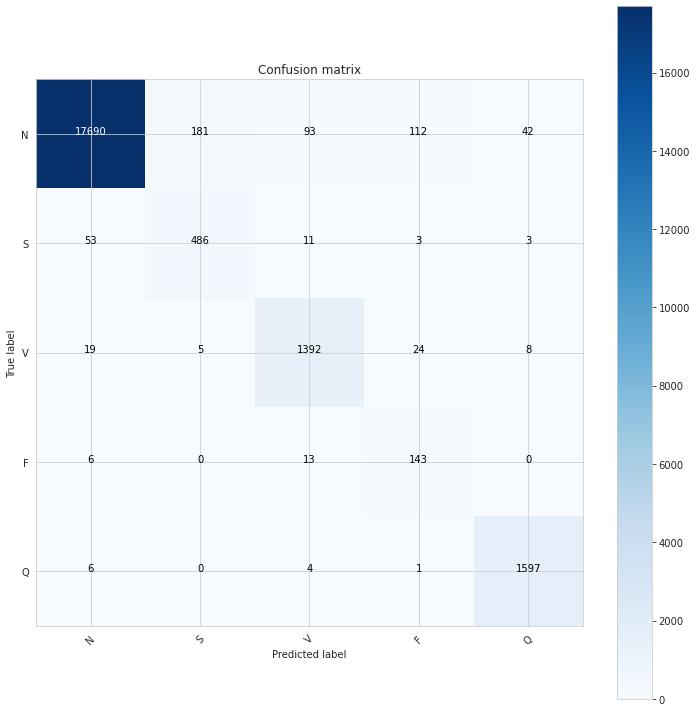

In [45]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix')
plt.show()

In [46]:
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18118
           1       0.72      0.87      0.79       556
           2       0.92      0.96      0.94      1448
           3       0.51      0.88      0.64       162
           4       0.97      0.99      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.82      0.94      0.87     21892
weighted avg       0.98      0.97      0.97     21892



Precision : TP/TP+FP

Recall : TP/TP+FN

F1 Score : 2 * (Precision*Recall) / (Precision + Recall)

Support : Number of elements in each class